In [107]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import os

In [2]:
data_files = glob.glob("Tell1CalibCsv/*.csv")

In [27]:
print(data_files)

['Tell1CalibCsv\\2010_08_16-21_00_00.csv', 'Tell1CalibCsv\\2010_08_18-21_00_00.csv', 'Tell1CalibCsv\\2011_03_07-20_00_00.csv', 'Tell1CalibCsv\\2011_05_01-12_46_00.csv', 'Tell1CalibCsv\\2011_06_18-19_00_00.csv', 'Tell1CalibCsv\\2011_07_26-15_00_00.csv', 'Tell1CalibCsv\\2011_09_09-17_30_00.csv', 'Tell1CalibCsv\\2012_04_06-17_30_00.csv', 'Tell1CalibCsv\\2012_04_27-09_00_00.csv', 'Tell1CalibCsv\\2012_05_04-01_30_00.csv', 'Tell1CalibCsv\\2012_06_27-18_00_00.csv', 'Tell1CalibCsv\\2012_07_06-20_00_00.csv', 'Tell1CalibCsv\\2012_07_30-20_00_00.csv', 'Tell1CalibCsv\\2012_08_01-21_00_00.csv', 'Tell1CalibCsv\\2012_08_02-17_00_00.csv', 'Tell1CalibCsv\\2012_08_14-22_00_00.csv', 'Tell1CalibCsv\\2012_09_23-20_00_00.csv', 'Tell1CalibCsv\\2013_01_30-16_00_00.csv', 'Tell1CalibCsv\\2015_07_02-17_00_00.csv', 'Tell1CalibCsv\\2015_09_05-20_00_00.csv', 'Tell1CalibCsv\\2015_11_14-19_00_00.csv', 'Tell1CalibCsv\\2015_11_23-21_00_00.csv', 'Tell1CalibCsv\\2016_05_19-22_00_00.csv', 'Tell1CalibCsv\\2016_05_31-16_34_

In [113]:
timestamps = []
for file in data_files:
    timestamps.append(datetime.datetime.strptime(os.path.basename(file), '%Y_%m_%d-%H_%M_%S.csv').strftime("%Y/%m/%d, %H:%M:%S"))

print(timestamps)

['2010/08/16, 21:00:00', '2010/08/18, 21:00:00', '2011/03/07, 20:00:00', '2011/05/01, 12:46:00', '2011/06/18, 19:00:00', '2011/07/26, 15:00:00', '2011/09/09, 17:30:00', '2012/04/06, 17:30:00', '2012/04/27, 09:00:00', '2012/05/04, 01:30:00', '2012/06/27, 18:00:00', '2012/07/06, 20:00:00', '2012/07/30, 20:00:00', '2012/08/01, 21:00:00', '2012/08/02, 17:00:00', '2012/08/14, 22:00:00', '2012/09/23, 20:00:00', '2013/01/30, 16:00:00', '2015/07/02, 17:00:00', '2015/09/05, 20:00:00', '2015/11/14, 19:00:00', '2015/11/23, 21:00:00', '2016/05/19, 22:00:00', '2016/05/31, 16:34:12', '2016/06/15, 16:32:13', '2016/11/07, 18:00:00', '2016/11/11, 18:00:00', '2017/05/21, 00:00:00', '2017/06/21, 16:30:00', '2017/07/18, 13:30:00', '2017/08/22, 15:30:00', '2017/08/24, 14:35:00', '2017/08/25, 16:40:00', '2017/09/01, 19:30:00', '2017/10/02, 12:10:00', '2017/10/10, 12:00:00', '2017/10/12, 13:00:00', '2018/04/17, 16:00:00', '2018/05/08, 14:50:50', '2018/06/07, 17:30:00', '2018/07/17, 22:20:00', '2018/08/16, 17

In [124]:
def join_pedestal_data_for_module(module_number=0):
    joined_data = pd.DataFrame()
    for file in data_files:
        data = pd.read_csv(file ,sep=' ', header=None, engine='python', error_bad_lines=False, warn_bad_lines=False)
        data = data[data[0].str.contains("pedestal")]
        data = data[data[1] == "VeloTELL1Board" + str(module_number)]
        joined_data = joined_data.append(data.loc[:, 2:2049], ignore_index=True)
    
    joined_data.index = timestamps
    joined_data.columns = range(2048)
    return joined_data

In [125]:
data = join_pedestal_data_for_module(1)
print(data)

                      0     1     2     3     4     5     6     7     8     \
2010/08/16, 21:00:00   508   510   510   509   510   511   511   512   513   
2010/08/18, 21:00:00   507   510   510   509   510   511   511   512   513   
2011/03/07, 20:00:00   510   511   511   511   512   513   513   514   515   
2011/05/01, 12:46:00   510   511   511   511   512   513   513   514   514   
2011/06/18, 19:00:00   510   512   511   511   512   513   513   514   514   
2011/07/26, 15:00:00   510   511   511   511   512   513   514   514   514   
2011/09/09, 17:30:00   510   512   511   511   512   513   514   514   515   
2012/04/06, 17:30:00   510   512   512   511   512   513   514   514   514   
2012/04/27, 09:00:00   510   512   511   511   512   513   514   514   514   
2012/05/04, 01:30:00   510   512   512   511   512   513   514   514   514   
2012/06/27, 18:00:00   510   512   512   511   512   513   514   514   514   
2012/07/06, 20:00:00   510   511   511   511   512   513   514  

<Figure size 1080x360 with 0 Axes>

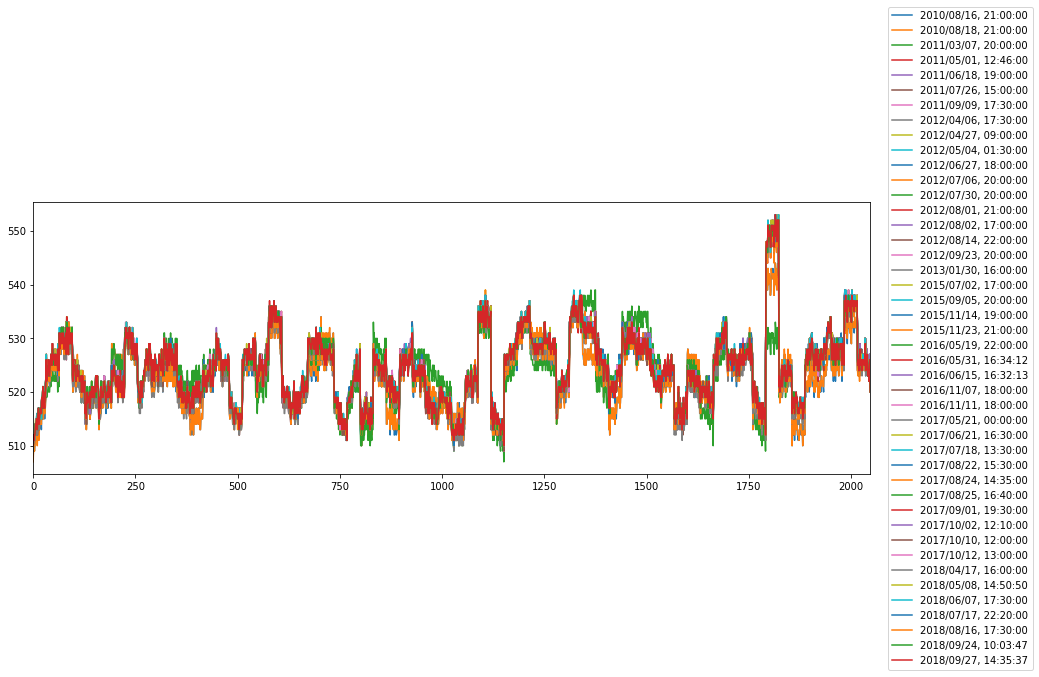

In [155]:
dat = data.T
#print(dat)

plt.figure();
dat.plot();
plt.legend(loc='center right', bbox_to_anchor=(1.2, 0.5))

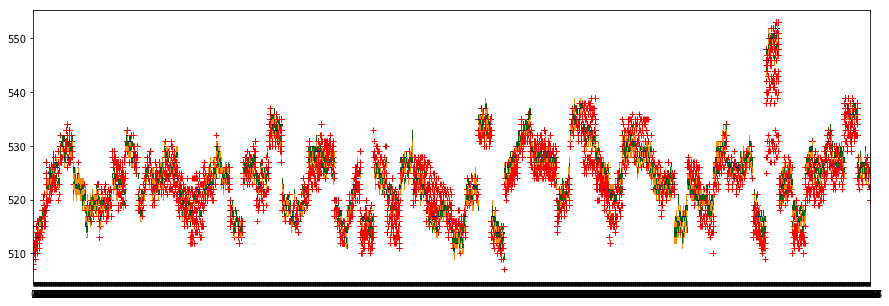

In [151]:
#dat = data.T
color = {'boxes': 'DarkGreen', 'whiskers': 'DarkOrange','medians': 'DarkBlue', 'caps': 'Gray'}
data.plot.box(color=color, sym='r+')